In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
def process_gait_data(file_path):
    scaler = MinMaxScaler()
    df = pd.read_csv(file_path)    
    if 'Time (s)' in df.columns:
        df.drop(columns=['Time (s)'], inplace=True)        
    df = df.ffill().bfill()  
    df.replace([np.inf, -np.inf], np.nan, inplace=True) 
    df.dropna(inplace=True) 
    data_scaled = scaler.fit_transform(df)    
    min_val, max_val = np.min(data_scaled), np.max(data_scaled)
    print("Min value:", min_val, "Max value:", max_val)    
    df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
    return df_scaled, scaler

In [3]:
stance_RA = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Right Stance/RA.csv'
stance_RH = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Right Stance/RH.csv'
stance_RK = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Right Stance/RK.csv'
swing_RA = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Right Swing/RA.csv'
swing_RH = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Right Swing/RH.csv'
swing_RK = '/kaggle/input/stance-swing-dataset/Processed/subject-1/trail-1/cycle-2/Right Swing/RK.csv'

scaled_stance_RA, scaler_stance_RA = process_gait_data(stance_RA)
scaled_stance_RH, scaler_stance_RH = process_gait_data(stance_RH)
scaled_stance_RK, scaler_stance_RK = process_gait_data(stance_RK)
scaled_swing_RA, scaler_swing_RA = process_gait_data(swing_RA)
scaled_swing_RH, scaler_swing_RH = process_gait_data(swing_RH)
scaled_swing_RK, scaler_swing_RK = process_gait_data(swing_RK)

print(scaled_stance_RA.head())

Min value: 0.0 Max value: 1.0
Min value: 0.0 Max value: 1.0000000000000002
Min value: 0.0 Max value: 1.0000000000000002
Min value: 0.0 Max value: 1.0000000000000004
Min value: 0.0 Max value: 1.0000000000000002
Min value: 0.0 Max value: 1.0
   X (m/s^2)  Y (m/s^2)  Z (m/s^2)     Theta
0   0.033416   0.476168   0.446112  0.560542
1   0.020765   0.473780   0.439035  0.566828
2   0.006922   0.445888   0.431872  0.574141
3   0.000275   0.412360   0.427098  0.579896
4   0.000000   0.392779   0.424369  0.583449


In [4]:
def create_sequences(data, seq_length):
    data = np.array(data)
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((seq, target))
    return sequences

seq_length = 10

sequences_ST_RA = create_sequences(scaled_stance_RA, seq_length)
sequences_ST_RH = create_sequences(scaled_stance_RH, seq_length)
sequences_ST_RK = create_sequences(scaled_stance_RK, seq_length)
sequences_SW_RA = create_sequences(scaled_swing_RA, seq_length)
sequences_SW_RH = create_sequences(scaled_swing_RH, seq_length)
sequences_SW_RK = create_sequences(scaled_swing_RK, seq_length)

In [5]:
def extract_X_y(sequences):
    X = np.array([seq[0] for seq in sequences])
    y = np.array([seq[1] for seq in sequences])
    return X, y

X_ST_RA, y_ST_RA = extract_X_y(sequences_ST_RA)
X_ST_RH, y_ST_RH = extract_X_y(sequences_ST_RH)
X_ST_RK, y_ST_RK = extract_X_y(sequences_ST_RK)
X_SW_RA, y_SW_RA = extract_X_y(sequences_SW_RA)
X_SW_RH, y_SW_RH = extract_X_y(sequences_SW_RH)
X_SW_RK, y_SW_RK = extract_X_y(sequences_SW_RK)

print(f"X_ST_RA shape: {X_ST_RA.shape}, y_ST_RA shape: {y_ST_RA.shape}")
print(np.isnan(X_ST_RA).sum(), np.isnan(y_ST_RA).sum())  
print(np.isinf(X_ST_RA).sum(), np.isinf(y_ST_RA).sum()) 

print(f"X_ST_RH shape: {X_ST_RH.shape}, y_ST_RH shape: {y_ST_RH.shape}")
print(np.isnan(X_ST_RH).sum(), np.isnan(y_ST_RH).sum()) 
print(np.isinf(X_ST_RH).sum(), np.isinf(y_ST_RH).sum()) 

print(f"X_ST_RK shape: {X_ST_RK.shape}, y_ST_RK shape: {y_ST_RK.shape}")
print(np.isnan(X_ST_RK).sum(), np.isnan(y_ST_RK).sum()) 
print(np.isinf(X_ST_RK).sum(), np.isinf(y_ST_RK).sum())  

print(f"X_SW_RA shape: {X_SW_RA.shape}, y_SW_RA shape: {y_SW_RA.shape}")
print(np.isnan(X_SW_RA).sum(), np.isnan(y_SW_RA).sum()) 
print(np.isinf(X_SW_RA).sum(), np.isinf(y_SW_RA).sum())  

print(f"X_SW_RH shape: {X_SW_RH.shape}, y_SW_RH shape: {y_SW_RH.shape}")
print(np.isnan(X_SW_RH).sum(), np.isnan(y_SW_RH).sum())  
print(np.isinf(X_SW_RH).sum(), np.isinf(y_SW_RH).sum()) 

print(f"X_SW_RK shape: {X_SW_RK.shape}, y_SW_RK shape: {y_SW_RK.shape}")
print(np.isnan(X_SW_RK).sum(), np.isnan(y_SW_RK).sum())  
print(np.isinf(X_SW_RK).sum(), np.isinf(y_SW_RK).sum()) 


X_ST_RA shape: (91, 10, 4), y_ST_RA shape: (91, 4)
0 0
0 0
X_ST_RH shape: (192, 10, 4), y_ST_RH shape: (192, 4)
0 0
0 0
X_ST_RK shape: (89, 10, 4), y_ST_RK shape: (89, 4)
0 0
0 0
X_SW_RA shape: (91, 10, 4), y_SW_RA shape: (91, 4)
0 0
0 0
X_SW_RH shape: (192, 10, 4), y_SW_RH shape: (192, 4)
0 0
0 0
X_SW_RK shape: (86, 10, 4), y_SW_RK shape: (86, 4)
0 0
0 0


In [6]:
def split_train_test(X, y, train_size=0.8):
    split_index = int(len(X) * train_size)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test

X_train_ST_RA, X_test_ST_RA, y_train_ST_RA, y_test_ST_RA = split_train_test(X_ST_RA, y_ST_RA)
X_train_ST_RH, X_test_ST_RH, y_train_ST_RH, y_test_ST_RH = split_train_test(X_ST_RH, y_ST_RH)
X_train_ST_RK, X_test_ST_RK, y_train_ST_RK, y_test_ST_RK = split_train_test(X_ST_RK, y_ST_RK)
X_train_SW_RA, X_test_SW_RA, y_train_SW_RA, y_test_SW_RA = split_train_test(X_SW_RA, y_SW_RA)
X_train_SW_RH, X_test_SW_RH, y_train_SW_RH, y_test_SW_RH = split_train_test(X_SW_RH, y_SW_RH)
X_train_SW_RK, X_test_SW_RK, y_train_SW_RK, y_test_SW_RK = split_train_test(X_SW_RK, y_SW_RK)


In [7]:
# Print shapes of the training sets
print(X_train_ST_RA.shape)
print(X_train_ST_RH.shape)
print(X_train_ST_RK.shape)
print(X_train_SW_RA.shape)
print(X_train_SW_RH.shape)
print(X_train_SW_RK.shape)

(72, 10, 4)
(153, 10, 4)
(71, 10, 4)
(72, 10, 4)
(153, 10, 4)
(68, 10, 4)


In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

In [9]:
# GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=input_shape))
    model.add(GRU(50, activation='tanh'))
    model.add(Dense(input_shape[-1]))
    model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='mse')
    return model

In [10]:
# # Prepare input shape
# input_shape = (X_train_LK.shape[1], X_train_LK.shape[2])

# gru_model = create_gru_model(input_shape)
# gru_model.summary()

In [11]:
def train_gru_for_joint(X_train, y_train, joint_name):
    input_shape = (X_train.shape[1], X_train.shape[2])
    gru_model = create_gru_model(input_shape)
    print(f"Training GRU model for {joint_name}...")
    gru_model.summary()
    history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
    return history, gru_model

In [12]:
histories = {}
models = {}

joint_data = {
    'ST_RA': (X_train_ST_RA, y_train_ST_RA),
    'ST_RH': (X_train_ST_RH, y_train_ST_RH),
    'ST_RK': (X_train_ST_RK, y_train_ST_RK),
    'SW_RA': (X_train_SW_RA, y_train_SW_RA),
    'SW_RH': (X_train_SW_RH, y_train_SW_RH),
    'SW_RK': (X_train_SW_RK, y_train_SW_RK)
}

In [13]:
for joint, (X_train, y_train) in joint_data.items():
    history, model = train_gru_for_joint(X_train, y_train, joint)
    histories[joint] = history
    models[joint] = model

print(histories)
print(models)

Training GRU model for ST_RA...


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 621ms/step - loss: 0.1731 - val_loss: 0.0883
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1183 - val_loss: 0.0443
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0745 - val_loss: 0.0164
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0399 - val_loss: 0.0041
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0261 - val_loss: 0.0061
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0289 - val_loss: 0.0147
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0328 - val_loss: 0.0180
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - val_loss: 0.0146
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0359 - val_loss: 0.0084
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0267 - val_loss: 0.0036
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0201 - val_loss: 0.0013
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0239 - val_loss: 0.0012


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.1613 - val_loss: 0.0511
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0611 - val_loss: 0.0170
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0403 - val_loss: 0.0326
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0358 - val_loss: 0.0251
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0238 - val_loss: 0.0206
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0202 - val_loss: 0.0176
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186 - val_loss: 0.0116
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0155 - val_loss: 0.0108
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0131 - val_loss: 0.0147
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0130 - val_loss: 0.0139
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0114 - val_loss: 0.0104
E

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.2984 - val_loss: 0.1556
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2113 - val_loss: 0.0947
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1417 - val_loss: 0.0484
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0976 - val_loss: 0.0180
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0572 - val_loss: 0.0059
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0398 - val_loss: 0.0121
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0412 - val_loss: 0.0255
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0461 - val_loss: 0.0332
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0443 - val_loss: 0.0308
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0397 - val_loss: 0.0237
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0300 - val_loss: 0.0174
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0317 - val_loss: 0.0120


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - loss: 0.3941 - val_loss: 0.3228
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3070 - val_loss: 0.2516
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2112 - val_loss: 0.1965
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1578 - val_loss: 0.1534
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1031 - val_loss: 0.1199
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0728 - val_loss: 0.0931
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0518 - val_loss: 0.0726
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0401 - val_loss: 0.0582
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - val_loss: 0.0501
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0473 - val_loss: 0.0462
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0441 - val_loss: 0.0446
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0480 - val_loss: 0.0448


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.3984 - val_loss: 0.1211
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1748 - val_loss: 0.0283
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0514 - val_loss: 0.0321
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0364 - val_loss: 0.0671
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0480 - val_loss: 0.0409
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0269 - val_loss: 0.0151
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0148 - val_loss: 0.0085
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0183 - val_loss: 0.0083
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0172 - val_loss: 0.0092
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0098 - val_loss: 0.0161
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0094 - val_loss: 0.0164
E

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 10, 50)         │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,904 (93.38 KB)

 Trainable params: 23,904 (93.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - loss: 0.1670 - val_loss: 0.2216
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0762 - val_loss: 0.1530
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0237 - val_loss: 0.1288
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0067 - val_loss: 0.1337
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - val_loss: 0.1377
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0179 - val_loss: 0.1321
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0155 - val_loss: 0.1233
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - val_loss: 0.1176
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - val_loss: 0.1147
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0059 - val_loss: 0.1128
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045 - val_loss: 0.1122
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035 - val_loss: 0.1132


In [14]:
print(histories)
print(models)

{'ST_RA': <keras.src.callbacks.history.History object at 0x7c690c0c9f30>, 'ST_RH': <keras.src.callbacks.history.History object at 0x7c68f048cf70>, 'ST_RK': <keras.src.callbacks.history.History object at 0x7c68c429ea70>, 'SW_RA': <keras.src.callbacks.history.History object at 0x7c68a86749d0>, 'SW_RH': <keras.src.callbacks.history.History object at 0x7c68a9442e90>, 'SW_RK': <keras.src.callbacks.history.History object at 0x7c68a90366b0>}
{'ST_RA': <Sequential name=sequential, built=True>, 'ST_RH': <Sequential name=sequential_1, built=True>, 'ST_RK': <Sequential name=sequential_2, built=True>, 'SW_RA': <Sequential name=sequential_3, built=True>, 'SW_RH': <Sequential name=sequential_4, built=True>, 'SW_RK': <Sequential name=sequential_5, built=True>}


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Evaluate models
def evaluate_model(model, X_test, y_test,scaler ,model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - Mean Absolute Error: {mae}')
    predictions_inverse = scaler.inverse_transform(predictions)
    print(X_test.shape)
    print(predictions.shape)
    print(predictions_inverse.shape)
    return predictions_inverse

In [16]:
# Plot results
def plot_predictions(y_test_inverse, predictions_inverse, feature_index, model_name, joint_name):
    plt.figure(figsize=(14, 7))
    
    # Plot true values vs predictions
    plt.plot(y_test_inverse[:, feature_index], label='True Values')
    plt.plot(predictions_inverse[:, feature_index], label=f'{model_name} Predictions')
    
    plt.xlabel('Time')
    plt.ylabel('X (m/s2)')
    plt.title(f'True Values vs {model_name} Predictions for X (m/s2) - {joint_name}')
    plt.legend()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
GRU for ST_RA - Mean Squared Error: 0.011497181872839362
GRU for ST_RA - Mean Absolute Error: 0.10048001108528903
(19, 10, 4)
(19, 4)
(19, 4)


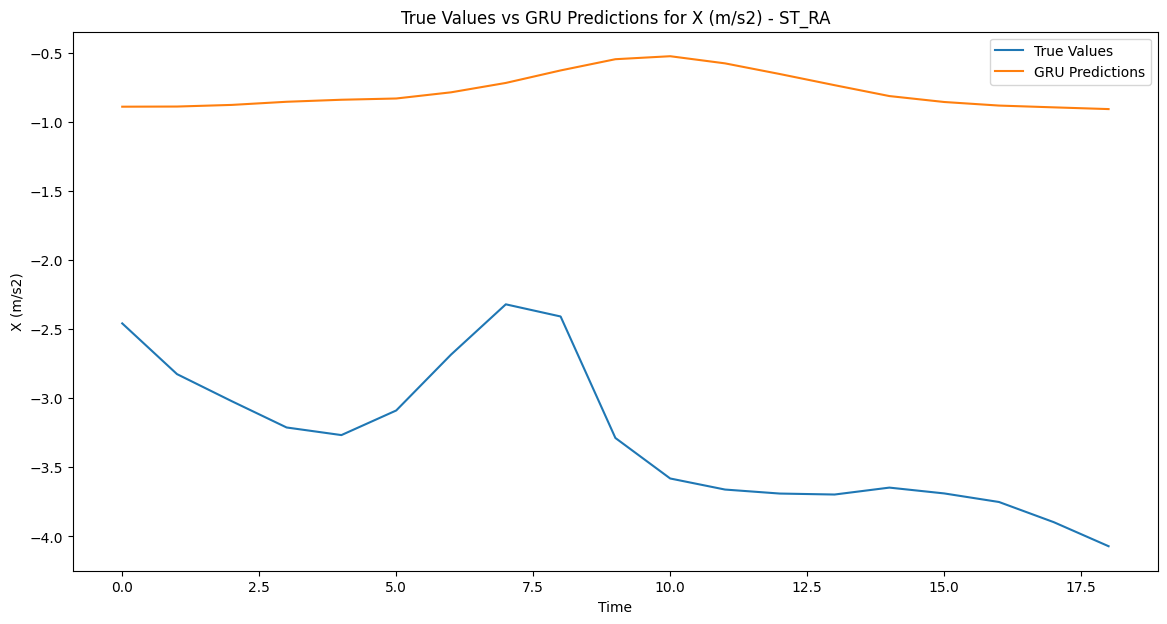

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
GRU for ST_RH - Mean Squared Error: 0.0045897525100621304
GRU for ST_RH - Mean Absolute Error: 0.058755154210780924
(39, 10, 4)
(39, 4)
(39, 4)


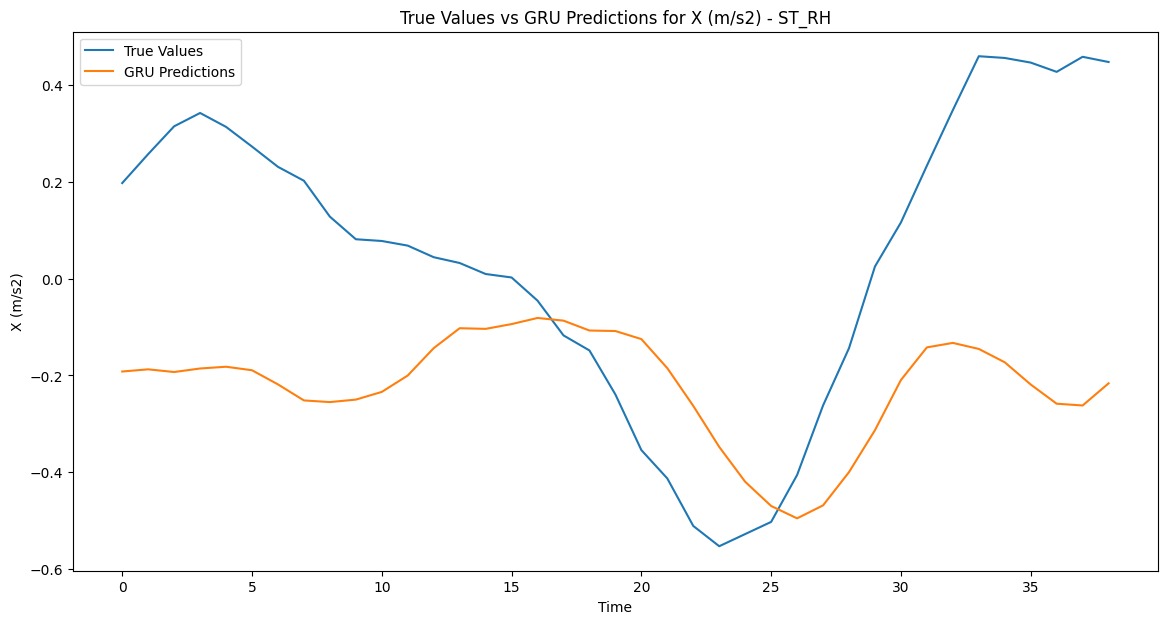

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
GRU for ST_RK - Mean Squared Error: 0.006836194227279886
GRU for ST_RK - Mean Absolute Error: 0.06776986965589112
(18, 10, 4)
(18, 4)
(18, 4)


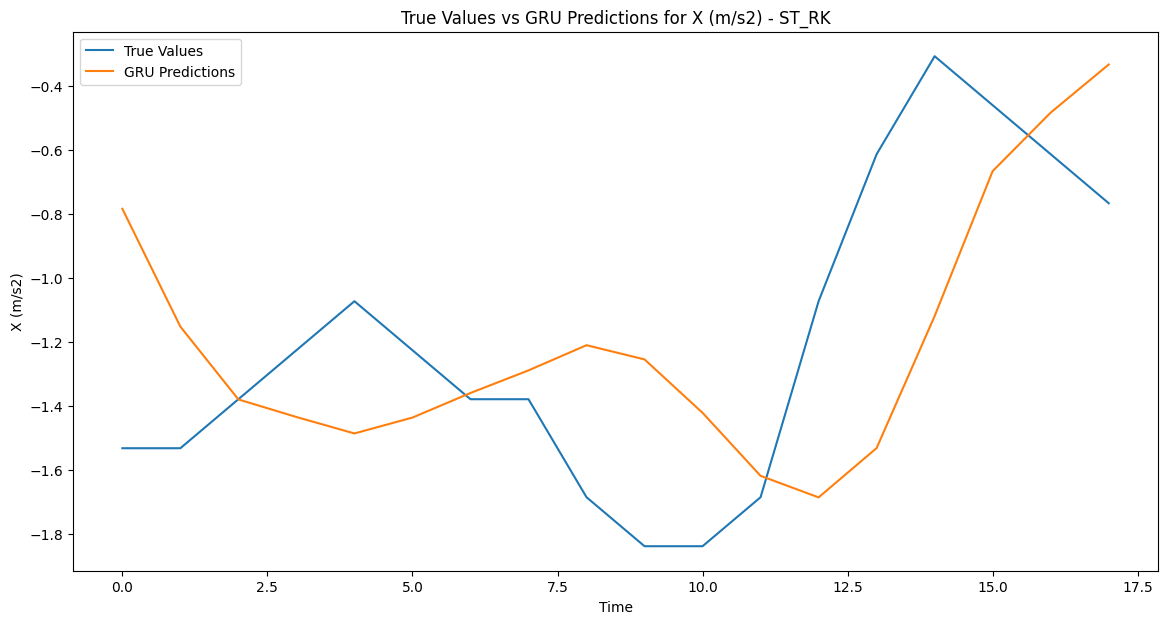

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
GRU for SW_RA - Mean Squared Error: 0.006093626637992745
GRU for SW_RA - Mean Absolute Error: 0.06046486113756849
(19, 10, 4)
(19, 4)
(19, 4)


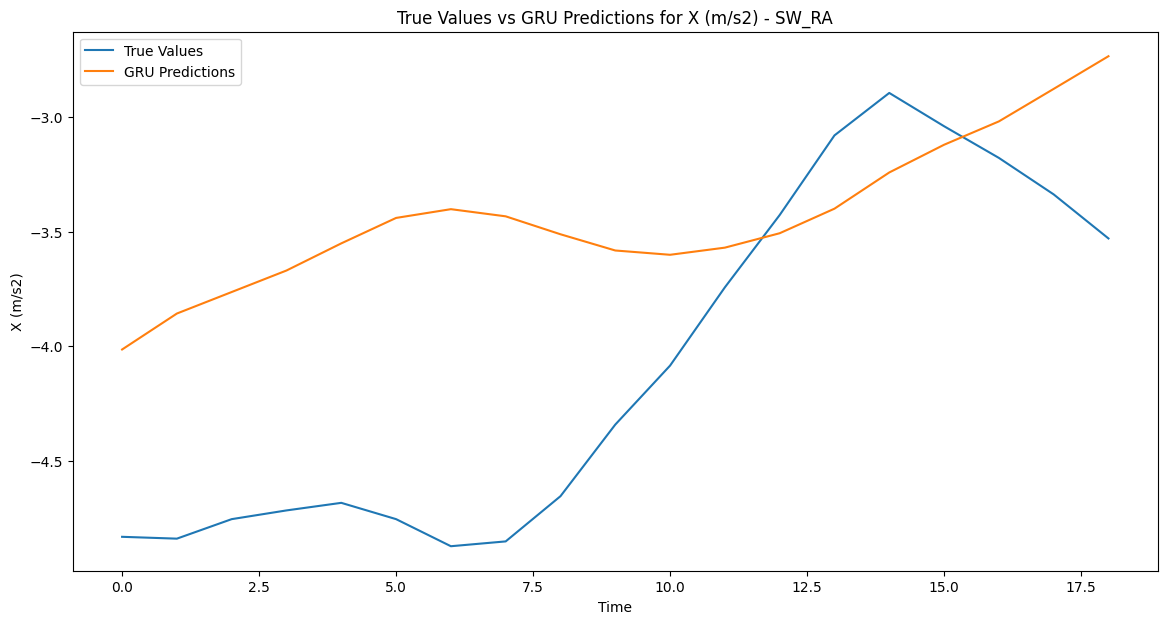

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
GRU for SW_RH - Mean Squared Error: 0.015028121494639099
GRU for SW_RH - Mean Absolute Error: 0.09859604443065764
(39, 10, 4)
(39, 4)
(39, 4)


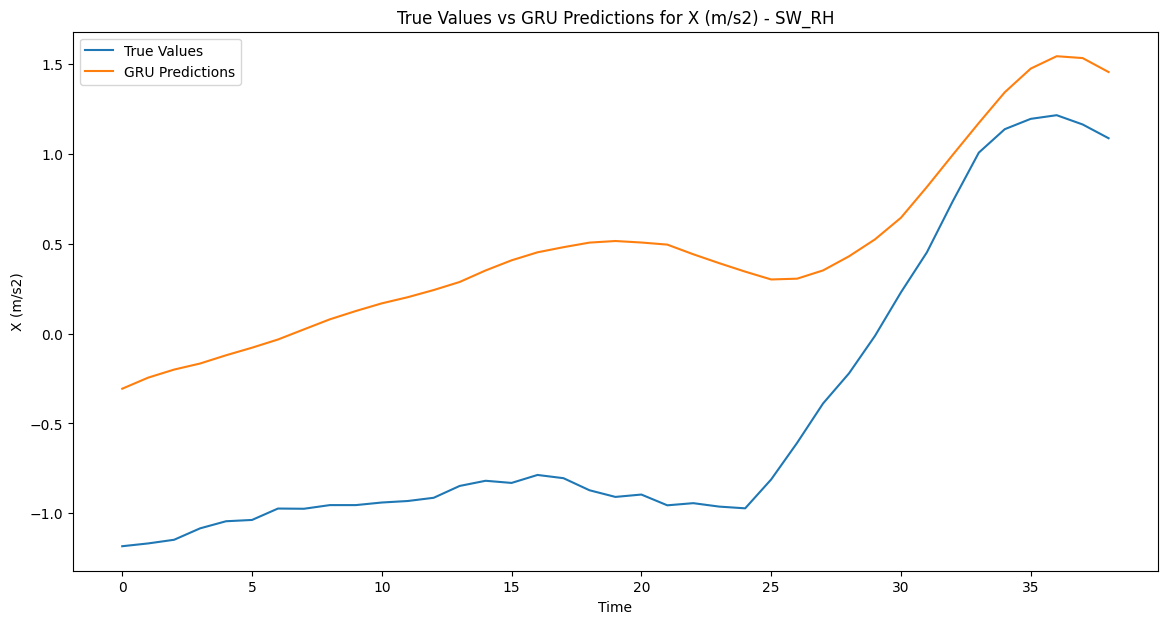

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
GRU for SW_RK - Mean Squared Error: 0.06788785551208833
GRU for SW_RK - Mean Absolute Error: 0.22360345846665705
(18, 10, 4)
(18, 4)
(18, 4)


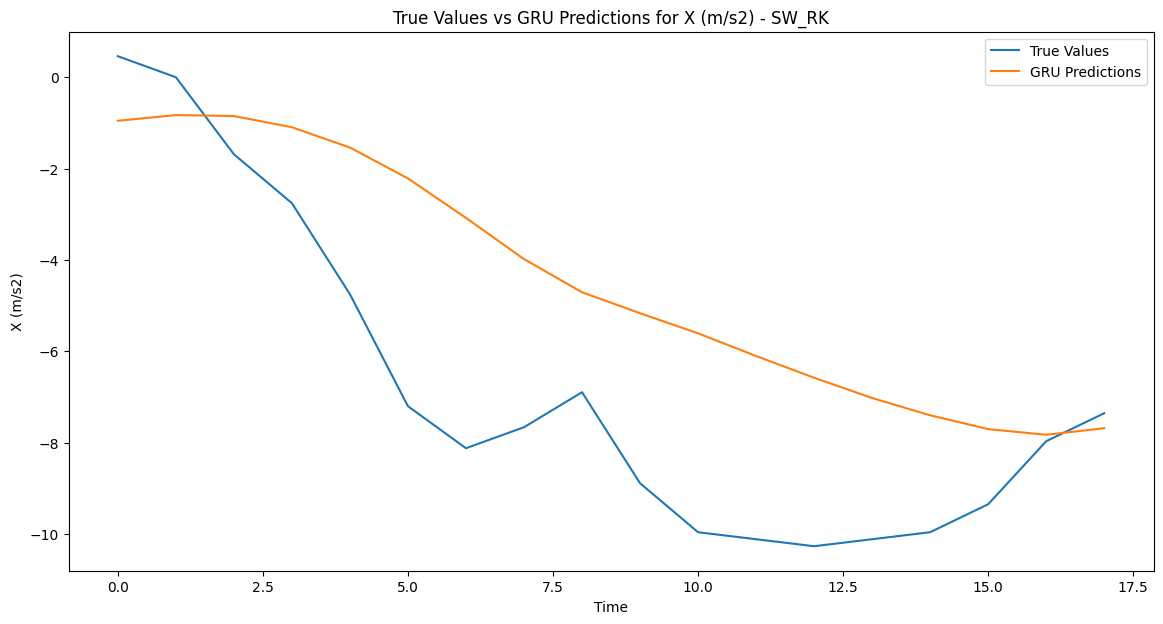

In [17]:
joint_data = {
    'ST_RA': (X_test_ST_RA, y_test_ST_RA, scaler_stance_RA),
    'ST_RH': (X_test_ST_RH, y_test_ST_RH, scaler_stance_RH),
    'ST_RK': (X_test_ST_RK, y_test_ST_RK, scaler_stance_RK),
    'SW_RA': (X_test_SW_RA, y_test_SW_RA, scaler_swing_RA),
    'SW_RH': (X_test_SW_RH, y_test_SW_RH, scaler_swing_RH),
    'SW_RK': (X_test_SW_RK, y_test_SW_RK, scaler_swing_RK)
}

for joint, (X_test, y_test, scaler) in joint_data.items():
    model = models[joint]
    
    if hasattr(scaler, 'min_'):
        predictions_inverse = evaluate_model(model, X_test, y_test, scaler, f'GRU for {joint}')
        
        y_test_inverse = scaler.inverse_transform(y_test)
        
        feature_index = 0
        
        plot_predictions(y_test_inverse, predictions_inverse, feature_index, 'GRU', joint)
    else:
        print(f"Scaler for {joint} has not been fitted.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU for ST_RK - Mean Squared Error: 0.006836194227279886
GRU for ST_RK - Mean Absolute Error: 0.06776986965589112
(18, 10, 4)
(18, 4)
(18, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU for SW_RK - Mean Squared Error: 0.06788785551208833
GRU for SW_RK - Mean Absolute Error: 0.22360345846665705
(18, 10, 4)
(18, 4)
(18, 4)


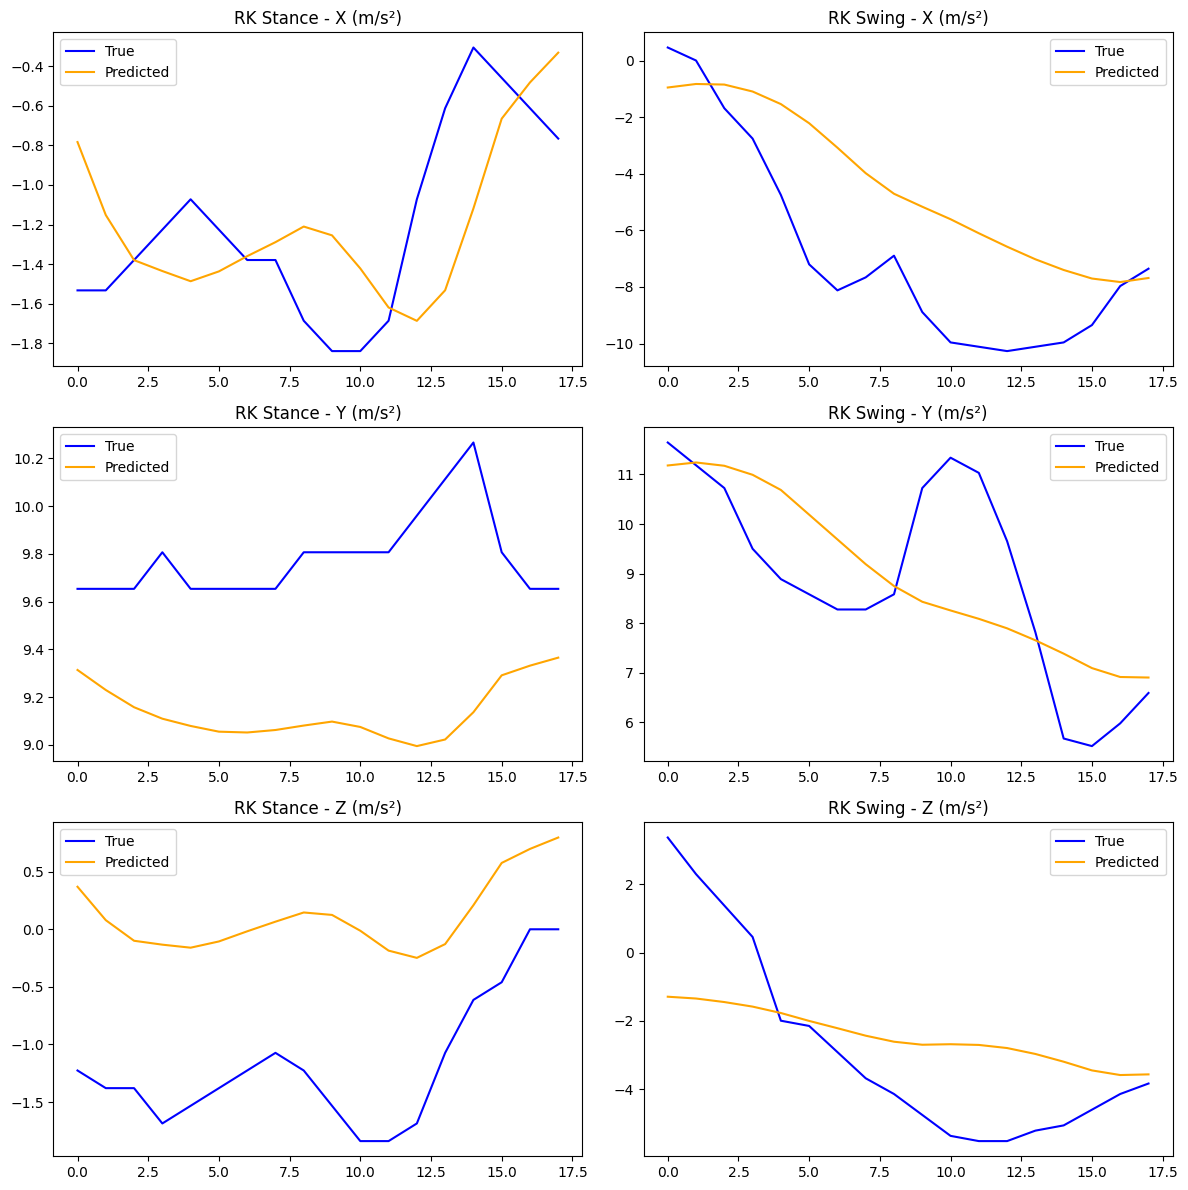

In [18]:
import matplotlib.pyplot as plt

def plot_joint_predictions(joint, y_test_inverse_stance, predictions_inverse_stance, y_test_inverse_swing, predictions_inverse_swing):
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    axes_labels = ['X (m/s²)', 'Y (m/s²)', 'Z (m/s²)']
    
    for i in range(3):  # For X, Y, and Z axis
        axes[i, 0].plot(y_test_inverse_stance[:, i], label='True', color='blue')
        axes[i, 0].plot(predictions_inverse_stance[:, i], label='Predicted', color='orange')
        axes[i, 0].set_title(f'{joint} Stance - {axes_labels[i]}')
        axes[i, 0].legend()
        
        axes[i, 1].plot(y_test_inverse_swing[:, i], label='True', color='blue')
        axes[i, 1].plot(predictions_inverse_swing[:, i], label='Predicted', color='orange')
        axes[i, 1].set_title(f'{joint} Swing - {axes_labels[i]}')
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

y_test_inverse_stance_RK = scaler_stance_RK.inverse_transform(y_test_ST_RK)
y_test_inverse_swing_RK = scaler_swing_RK.inverse_transform(y_test_SW_RK)

predictions_inverse_stance_RK = evaluate_model(models['ST_RK'], X_test_ST_RK, y_test_ST_RK, scaler_stance_RK, 'GRU for ST_RK')
predictions_inverse_swing_RK = evaluate_model(models['SW_RK'], X_test_SW_RK, y_test_SW_RK, scaler_swing_RK, 'GRU for SW_RK')
plot_joint_predictions('RK', y_test_inverse_stance_RK, predictions_inverse_stance_RK, y_test_inverse_swing_RK, predictions_inverse_swing_RK)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU for ST_RA - Mean Squared Error: 0.011497181872839362
GRU for ST_RA - Mean Absolute Error: 0.10048001108528903
(19, 10, 4)
(19, 4)
(19, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU for SW_RA - Mean Squared Error: 0.006093626637992745
GRU for SW_RA - Mean Absolute Error: 0.06046486113756849
(19, 10, 4)
(19, 4)
(19, 4)


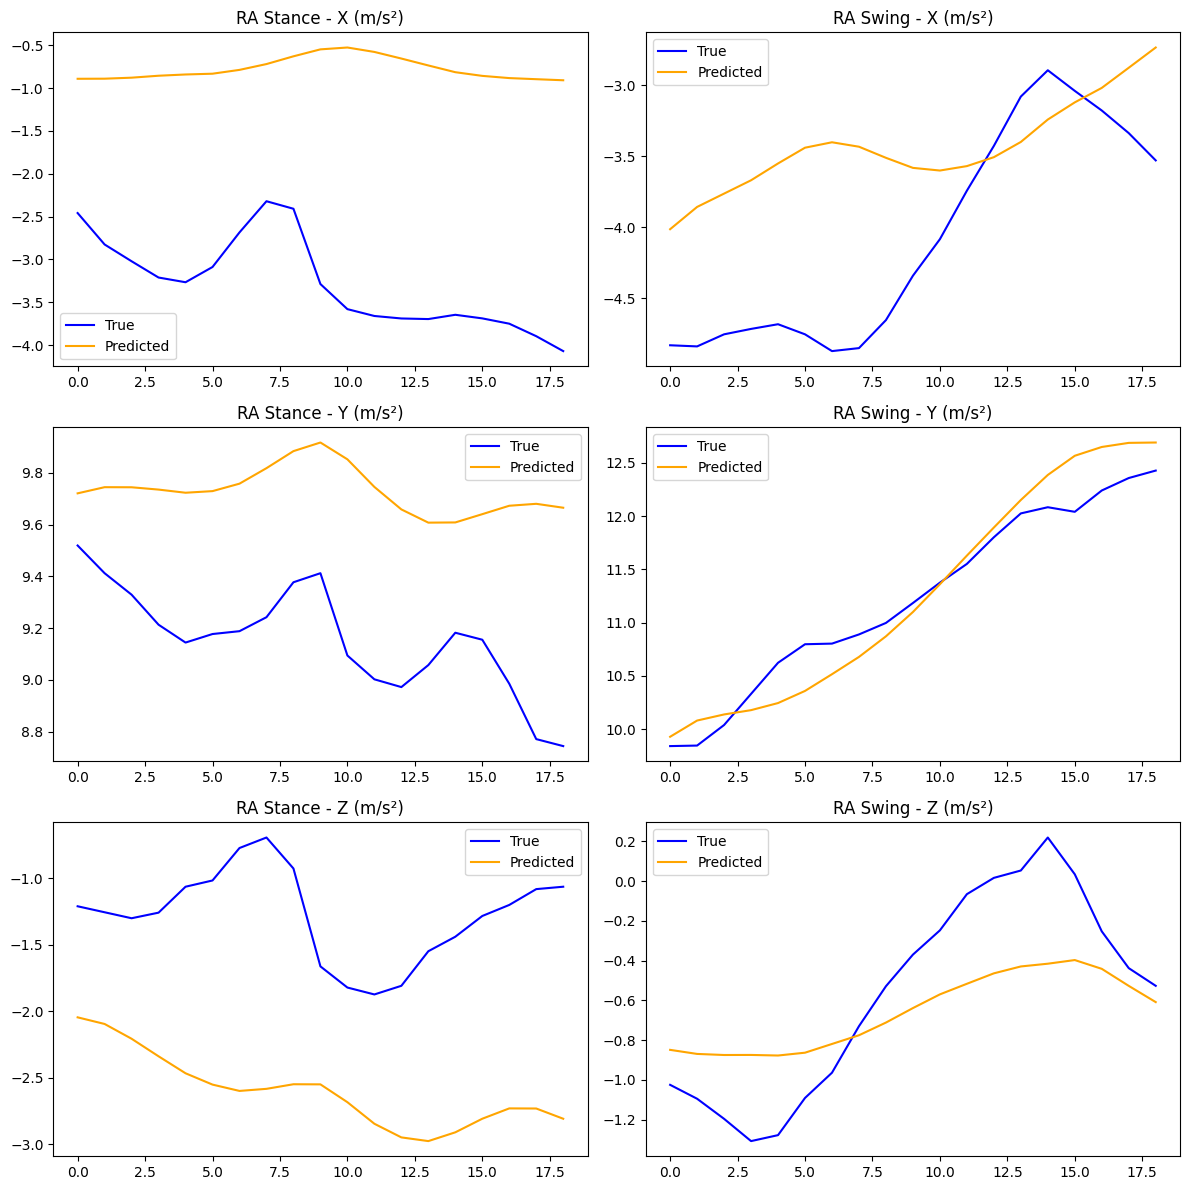

In [19]:
y_test_inverse_stance_RA = scaler_stance_RA.inverse_transform(y_test_ST_RA)
y_test_inverse_swing_RA = scaler_swing_RA.inverse_transform(y_test_SW_RA)

predictions_inverse_stance_RA = evaluate_model(models['ST_RA'], X_test_ST_RA, y_test_ST_RA, scaler_stance_RA, 'GRU for ST_RA')
predictions_inverse_swing_RA = evaluate_model(models['SW_RA'], X_test_SW_RA, y_test_SW_RA, scaler_swing_RA, 'GRU for SW_RA')

plot_joint_predictions('RA', y_test_inverse_stance_RA, predictions_inverse_stance_RA, y_test_inverse_swing_RA, predictions_inverse_swing_RA)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
GRU for ST_RH - Mean Squared Error: 0.0045897525100621304
GRU for ST_RH - Mean Absolute Error: 0.058755154210780924
(39, 10, 4)
(39, 4)
(39, 4)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
GRU for SW_RH - Mean Squared Error: 0.015028121494639099
GRU for SW_RH - Mean Absolute Error: 0.09859604443065764
(39, 10, 4)
(39, 4)
(39, 4)


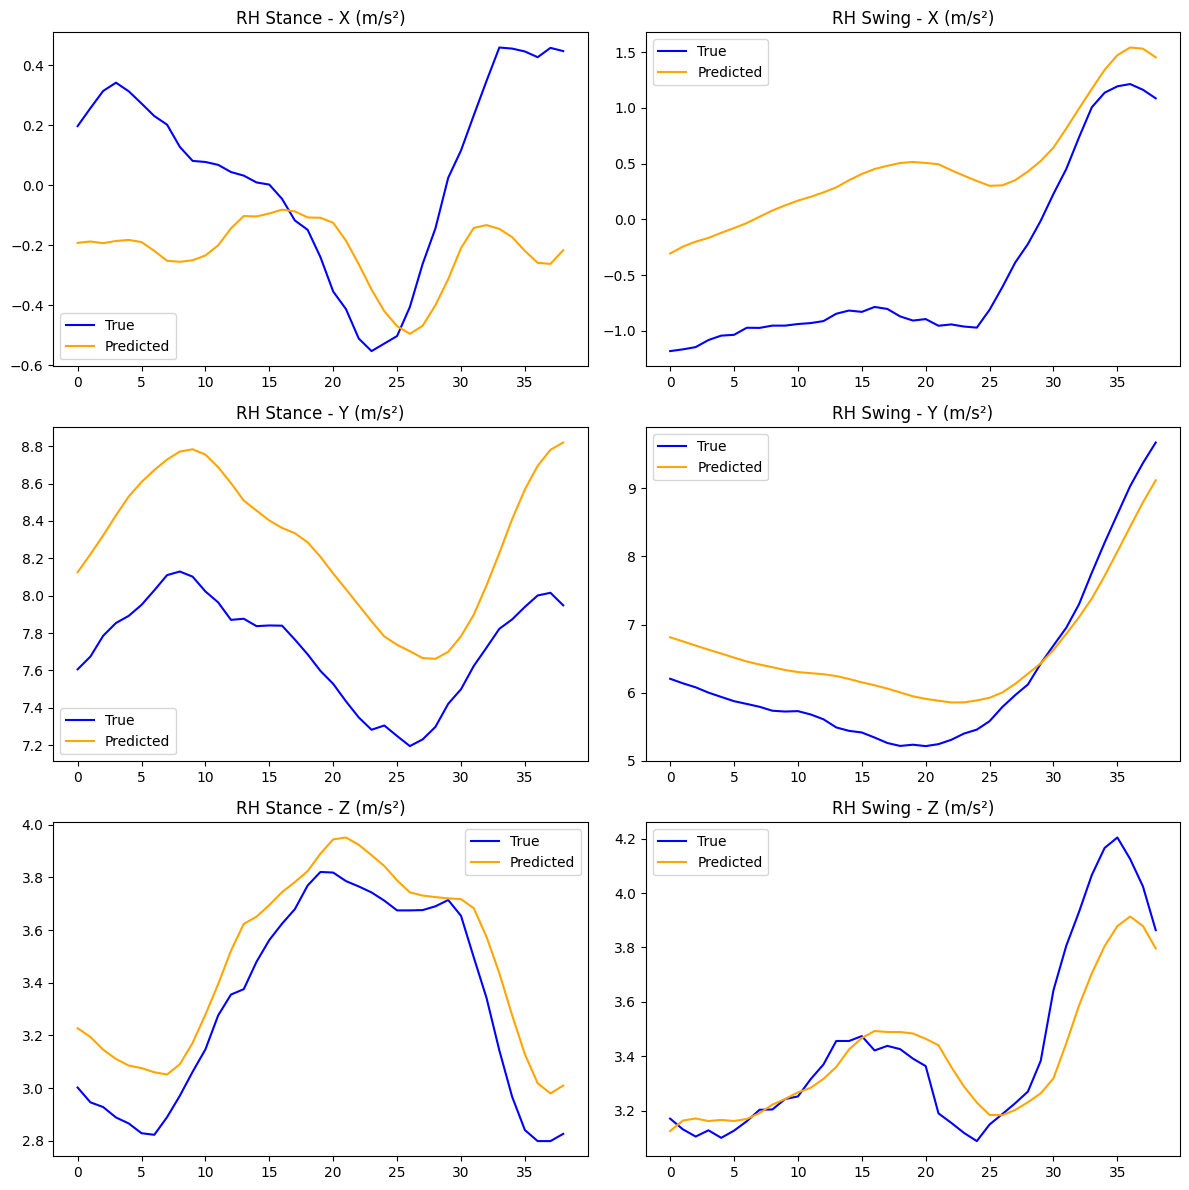

In [20]:
y_test_inverse_stance_RH = scaler_stance_RH.inverse_transform(y_test_ST_RH)
y_test_inverse_swing_RH = scaler_swing_RH.inverse_transform(y_test_SW_RH)

predictions_inverse_stance_RH = evaluate_model(models['ST_RH'], X_test_ST_RH, y_test_ST_RH, scaler_stance_RH, 'GRU for ST_RH')
predictions_inverse_swing_RH = evaluate_model(models['SW_RH'], X_test_SW_RH, y_test_SW_RH, scaler_swing_RH, 'GRU for SW_RH')

plot_joint_predictions('RH', y_test_inverse_stance_RH, predictions_inverse_stance_RH, y_test_inverse_swing_RH, predictions_inverse_swing_RH)
